## LICENSE PLATE NUMBER RECOGNITION USING PYTESSERACT

#### 1. Importing required libraries

In [1]:
import pytesseract 
import matplotlib.pyplot as plt
from tkinter import *
from PIL import ImageTk, Image , ImageFilter
import cv2 
import glob 
import os

#### 2. Attaching the tesseract execution file

In [2]:
pytesseract.pytesseract.tesseract_cmd = r"D:\Tesseract\tesseract.exe"

#### 3. Creating the model which will recognize the license plates

In [3]:
def ocr_model(x):
    img = Image.open(x)
    text = pytesseract.image_to_string(img, lang='eng', config='-c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789')
    print(text)

In [4]:
# importing the module 
import cv2 

# function to display the coordinates of 
# of the points clicked on the image 
def click_event(event, x, y, flags, params): 

	# checking for left mouse clicks 
	if event == cv2.EVENT_LBUTTONDOWN: 

		# displaying the coordinates 
		# on the Shell 
		print(x, ' ', y) 

		# displaying the coordinates 
		# on the image window 
		font = cv2.FONT_HERSHEY_SIMPLEX 
		cv2.putText(img, str(x) + ',' +
					str(y), (x,y), font, 
					1, (255, 0, 0), 2) 
		cv2.imshow('image', img) 

	# checking for right mouse clicks	 
	if event==cv2.EVENT_RBUTTONDOWN: 

		# displaying the coordinates 
		# on the Shell 
		print(x, ' ', y) 

		# displaying the coordinates 
		# on the image window 
		font = cv2.FONT_HERSHEY_SIMPLEX 
		b = img[y, x, 0] 
		g = img[y, x, 1] 
		r = img[y, x, 2] 
		cv2.putText(img, str(b) + ',' +
					str(g) + ',' + str(r), 
					(x,y), font, 1, 
					(255, 255, 0), 2) 
		cv2.imshow('image', img) 

# driver function 
if __name__=="__main__": 

	# reading the image 
	img = cv2.imread('./Original/Cars5.png', 1) 

	# displaying the image 
	cv2.imshow('image', img) 

	# setting mouse hadler for the image 
	# and calling the click_event() function 
	cv2.setMouseCallback('image', click_event) 

	# wait for a key to be pressed to exit 
	cv2.waitKey(0) 

	# close the window 
	cv2.destroyAllWindows() 

200   167
393   165
214   213
376   213


In [5]:
# import the necessary packages
import numpy as np
import cv2
def order_points(pts):
	# initialzie a list of coordinates that will be ordered
	# such that the first entry in the list is the top-left,
	# the second entry is the top-right, the third is the
	# bottom-right, and the fourth is the bottom-left
	rect = np.zeros((4, 2), dtype = "float32")
	# the top-left point will have the smallest sum, whereas
	# the bottom-right point will have the largest sum
	s = pts.sum(axis = 1)
	rect[0] = pts[np.argmin(s)]
	rect[2] = pts[np.argmax(s)]
	# now, compute the difference between the points, the
	# top-right point will have the smallest difference,
	# whereas the bottom-left will have the largest difference
	diff = np.diff(pts, axis = 1)
	rect[1] = pts[np.argmin(diff)]
	rect[3] = pts[np.argmax(diff)]
	# return the ordered coordinates
	return rect

In [6]:
def four_point_transform(image, pts):
	# obtain a consistent order of the points and unpack them
	# individually
	rect = order_points(pts)
	(tl, tr, br, bl) = rect
	# compute the width of the new image, which will be the
	# maximum distance between bottom-right and bottom-left
	# x-coordiates or the top-right and top-left x-coordinates
	widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
	widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
	maxWidth = max(int(widthA), int(widthB))
	# compute the height of the new image, which will be the
	# maximum distance between the top-right and bottom-right
	# y-coordinates or the top-left and bottom-left y-coordinates
	heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
	heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
	maxHeight = max(int(heightA), int(heightB))
	# now that we have the dimensions of the new image, construct
	# the set of destination points to obtain a "birds eye view",
	# (i.e. top-down view) of the image, again specifying points
	# in the top-left, top-right, bottom-right, and bottom-left
	# order
	dst = np.array([
		[0, 0],
		[maxWidth - 1, 0],
		[maxWidth - 1, maxHeight - 1],
		[0, maxHeight - 1]], dtype = "float32")
	# compute the perspective transform matrix and then apply it
	M = cv2.getPerspectiveTransform(rect, dst)
	warped = cv2.warpPerspective(image, M, (maxWidth, maxHeight))
	# return the warped image
	return warped

In [7]:
import numpy as np
image = cv2.imread("./Original/Cars5.png")
pts = np.float32([[198,167], [394,166], [212,210], [378,209]])

In [8]:
warped = four_point_transform(image, pts)
cv2.imshow("Original", image)
cv2.imshow("Warped", warped)
cv2.waitKey(0)

-1

In [9]:
cv2.imwrite("cut1.jpg", warped) 

True

In [10]:
img = cv2.imread('cut1.jpg', cv2.IMREAD_UNCHANGED)
 
print('Original Dimensions : ',img.shape)
 
scale_percent = 450 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
  
# resize image
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
 
print('Resized Dimensions : ',resized.shape)
 
cv2.imshow("Resized image", resized)
cv2.waitKey(0)
cv2.destroyAllWindows()

Original Dimensions :  (45, 196, 3)
Resized Dimensions :  (202, 882, 3)


In [11]:
cv2.imwrite("cut2_resized.jpg", resized) 

True

**IMAGE**

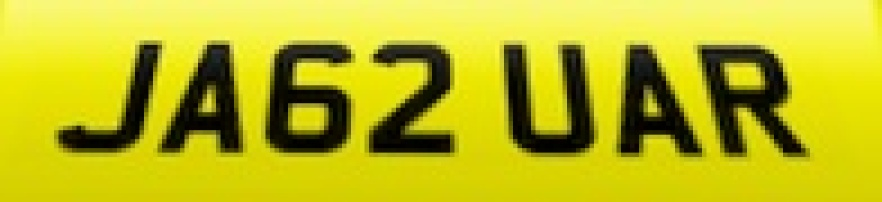

In [12]:
from IPython.display import Image
Image('cut2_resized.jpg')

**READING**

In [13]:
from PIL import Image
ocr_model('cut2_resized.jpg')

JA62UAR



**IMAGE SHARPENING**

In [14]:
import cv2
import numpy as np
# Reading in and displaying our image
image = cv2.imread('cut2_resized.jpg')
cv2.imshow('Original', image)
# Create our shapening kernel, it must equal to one eventually
kernel_sharpening = np.array([[-1,-1,-1], 
                              [-1, 9,-1],
                              [-1,-1,-1]])
# applying the sharpening kernel to the input image & displaying it.
sharpened = cv2.filter2D(image, -1, kernel_sharpening)
cv2.imshow('Image Sharpening', sharpened)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [15]:
cv2.imwrite('cut2_resized.jpg',sharpened)

True

In [16]:
from PIL import Image
ocr_model('cut2_resized.jpg')

In [17]:
def gray(img):
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    cv2.imwrite("cut2_resized.jpg",img)
    return img

In [18]:
gray(image)

array([[218, 218, 218, ..., 201, 201, 201],
       [218, 218, 218, ..., 201, 201, 201],
       [218, 218, 218, ..., 201, 201, 201],
       ...,
       [184, 184, 184, ..., 184, 184, 184],
       [184, 184, 184, ..., 184, 184, 184],
       [184, 184, 184, ..., 184, 184, 184]], dtype=uint8)

In [19]:
from PIL import Image
ocr_model('cut2_resized.jpg')

JA6B2UAR



In [20]:
def threshold(img):
    #pixels with value below 100 are turned black (0) and those with higher value are turned white (255)
    img = cv2.threshold(img, 100, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY)[1]    
    cv2.imwrite("cut4_threshold.jpg",img)
    return img

In [21]:
image = cv2.imread('cut2_resized.jpg', cv2.IMREAD_GRAYSCALE)
im_thresh = threshold(image)

In [22]:
from PIL import Image
ocr_model('cut4_threshold.jpg')

JA6B2UAR



In [23]:
def blur(img) :
    img_blur = cv2.GaussianBlur(img,(5,5),0)
    cv2.imwrite("cut4_blur.jpg",img)    
    return img_blur

In [24]:
blur(image)

array([[218, 218, 218, ..., 201, 201, 201],
       [218, 218, 218, ..., 201, 201, 201],
       [218, 218, 218, ..., 202, 201, 201],
       ...,
       [184, 184, 184, ..., 184, 184, 184],
       [184, 184, 184, ..., 184, 184, 184],
       [184, 184, 184, ..., 184, 184, 184]], dtype=uint8)

In [25]:
from PIL import Image
ocr_model('cut4_blur.jpg')

JA62UAR



#### 4. Creating lists containing actual license plate and detected license plate names respectively

In [26]:
actual_license_plates = []
for x in glob.glob(r"D:\AI-JOS\Resized\*.jpg"):
    y = x.split("\\")[-1].split(".")[0]
    actual_license_plates.append(y)

In [27]:
predicted_license_plates = []
for x in glob.glob(r"D:\AI-JOS\Resized\*.jpg"):
    img = Image.open(x)
    text = pytesseract.image_to_string(img, lang='eng', config='-c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789')
    predicted_license_plates.append(text)

#### 5. Actual vs Predicted

In [28]:
print("Actual License Plate", "\t", "Predicted License Plate", "\t" ) 
print("--------------------", "\t", "-----------------------", "\t" ) 

def calculate_predicted_accuracy(actual_list, predicted_list): 
    for actual_plate, predict_plate in zip(actual_list, predicted_list): 
        accuracy = "0 %"
        num_matches = 0
        if actual_plate == predict_plate: 
            accuracy = "100 %"
        else: 
            if len(actual_plate) == len(predict_plate): 
                for a, p in zip(actual_plate, predict_plate): 
                    if a == p: 
                        num_matches += 1
                accuracy = str(round((num_matches / len(actual_plate)), 2) * 100) 
                accuracy += "%"
        print("	 ", actual_plate, "\t\t\t", predict_plate, "\t\t\t",) 


calculate_predicted_accuracy(actual_license_plates, predicted_license_plates)

Actual License Plate 	 Predicted License Plate 	
-------------------- 	 ----------------------- 	
	  DZ17YXR 			  			
	  J98257 			 JS8257
 			
	  JA62UAR 			 JA62UAR
 			
	  MH12BG7237 			 MH12BG7237
 			
	  MHO1AV8866 			 MHO1AV8866
 			
	  OX65AWD 			  			
	  WOR516K 			  			
